In [1]:
import yfinance as yf 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt


In [2]:
spy = yf.download("^SPX", interval="1mo") # call spy
vix = yf.download("^VIX", interval = "1mo") # call vix 
# monthly spy convert 
vix =vix.drop(columns=['Open', 'High', 'Low', 'Volume'])
vix = vix.reset_index()
vix.columns = ['Date', 'Close']

spy =spy.drop(columns=['Open', 'High', 'Low', 'Volume'])
spy = spy.reset_index()
spy.columns = ['Date', 'Close']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
url = "https://fred.stlouisfed.org/graph/fredgraph.csv?id=RECPROUSM156N"
markov = pd.read_csv(url)
#markov = pd.read_csv("/Users/nshaffer/Desktop/coding '25/rec2.0.csv")
markov.columns = ["Date", "Prob"]
markov



,Date,Prob
0,1967-06-01,0.98
1,1967-07-01,0.60
2,1967-08-01,0.06
3,1967-09-01,0.38
4,1967-10-01,0.04
...,...,...
689,2024-11-01,0.28
690,2024-12-01,0.20
691,2025-01-01,0.26
692,2025-02-01,0.18


In [4]:
# sets to datetime 
spy["Date"] = pd.to_datetime(spy["Date"])
markov["Date"] = pd.to_datetime(markov["Date"])
# merge the two dataframes on date
merged = pd.merge_asof(
    spy.sort_values("Date"), 
    markov.sort_values("Date"), 
    left_on="Date", 
    right_on="Date", 
    direction='nearest'
)

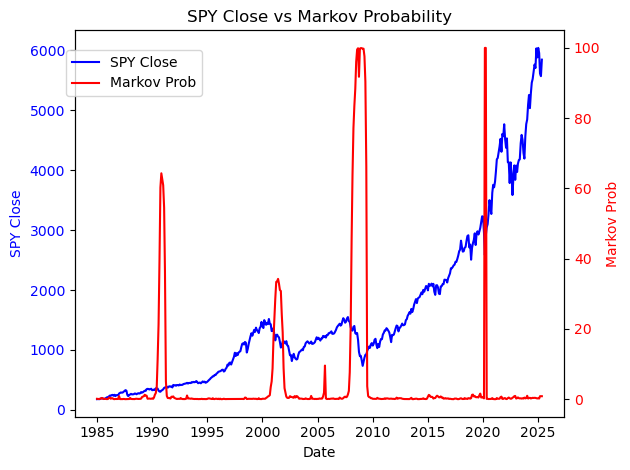

In [5]:
import matplotlib.pyplot as plt
import datetime as dt

#OG numbers
"""x_start = dt.datetime(1985, 1, 1)
x_end = dt.datetime(2025, 5, 1)"""

# Define your date range as datetime objects
x_start = dt.datetime(1985, 1, 1)
x_end = dt.datetime(2025, 5, 1)

# Subset the data to the desired date range
mask = (merged["Date"] >= x_start) & (merged["Date"] <= x_end)
subset = merged.loc[mask]

fig, ax1 = plt.subplots()

# Plot only the data in the selected date range
ax1.plot(subset["Date"], subset["Close"], color='blue', label="SPY Close")
ax1.set_xlabel("Date")
ax1.set_ylabel("SPY Close", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for Markov Prob
ax2 = ax1.twinx()
ax2.plot(subset["Date"], subset["Prob"], color='red', label="Markov Prob")
ax2.set_ylabel("Markov Prob", color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("SPY Close vs Markov Probability")
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.show()


In [6]:
merged

,Date,Close,Prob
0,1985-01-01,179.630005,0.10
1,1985-02-01,181.179993,0.08
2,1985-03-01,180.660004,0.04
3,1985-04-01,179.830002,0.10
4,1985-05-01,189.550003,0.08
...,...,...,...
480,2025-01-01,6040.529785,0.26
481,2025-02-01,5954.500000,0.18
482,2025-03-01,5611.850098,0.84
483,2025-04-01,5569.060059,0.84


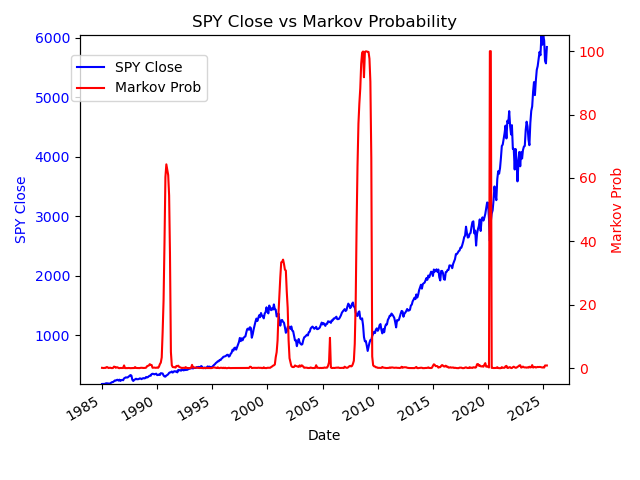

In [7]:
%matplotlib widget
import matplotlib.pyplot as plt
import datetime as dt

# Define your date range as datetime objects
x_start = dt.datetime(1985, 1, 1)
x_end = dt.datetime(2025, 5, 1)

# Subset the data to the desired date range
mask = (merged["Date"] >= x_start) & (merged["Date"] <= x_end)
subset = merged.loc[mask]

fig, ax1 = plt.subplots()

# Plot SPY Close price
ax1.plot(subset["Date"], subset["Close"], color='blue', label="SPY Close")
ax1.set_xlabel("Date")
ax1.set_ylabel("SPY Close", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(subset["Close"].min(), subset["Close"].max())

# Plot Markov Prob on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(subset["Date"], subset["Prob"], color='red', label="Markov Prob")
ax2.set_ylabel("Markov Prob", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a small buffer to the min/max to prevent the line from touching the chart edge
prob_min = subset["Prob"].min()
prob_max = subset["Prob"].max()
buffer = (prob_max - prob_min) * 0.05 if prob_max > prob_min else 0.05  # 5% buffer or 0.05 if flat
ax2.set_ylim(prob_min - buffer, prob_max + buffer)

plt.title("SPY Close vs Markov Probability")
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# This line auto-formats the x-axis date labels to avoid overlap
fig.autofmt_xdate()  # <-- Add this line

plt.show()
